In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

First 5 rows of the dataset:
   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  
0             1,430              152  
1             2,297              231  
2             2,352              278  
3             2,327              287  
4             2,130              236  

Column names in dataset: Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

Mean Absolute Error (MAE): 738.67


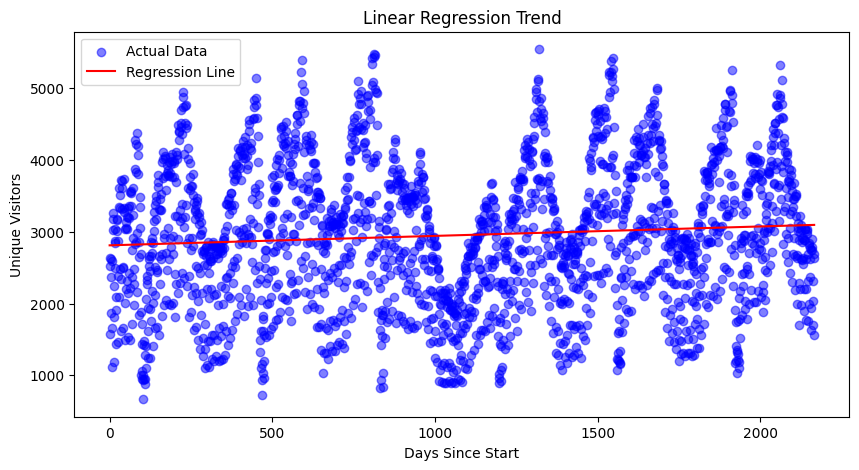

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Forecasted Visitor Counts for Next 5 Days:
        Date  Predicted_Visitors
0 2020-08-20                3094
1 2020-08-21                3094
2 2020-08-22                3095
3 2020-08-23                3095
4 2020-08-24                3095


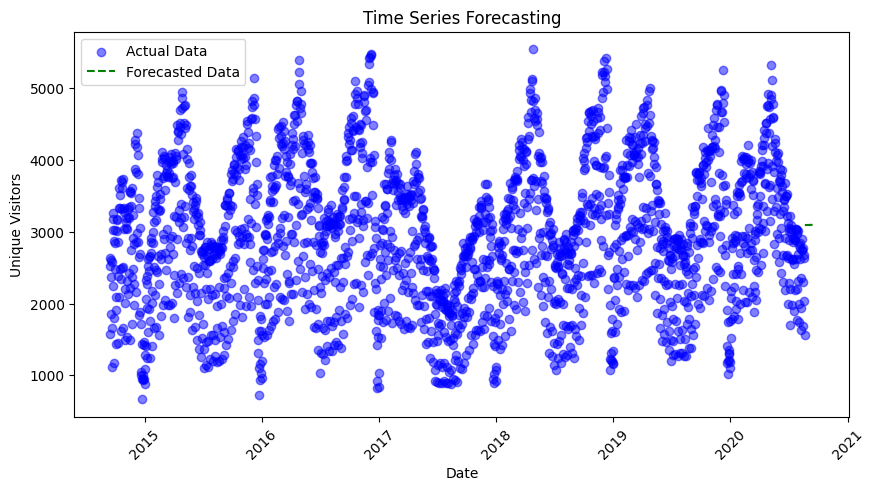

In [2]:

file_path = "/content/drive/MyDrive/time series/EXP5/daily-website-visitors.csv"
df = pd.read_csv(file_path)


print("First 5 rows of the dataset:")
print(df.head())

print("\nColumn names in dataset:", df.columns)


df.columns = df.columns.str.strip()


expected_columns = ["Date", "Unique.Visits"]
for col in expected_columns:
    if col not in df.columns:
        raise ValueError(f"Error: Expected column '{col}' not found. Available columns: {df.columns}")


df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)


df['Unique.Visits'] = df['Unique.Visits'].str.replace(',', '').astype(int)


df['Days'] = (df['Date'] - df['Date'].min()).dt.days


X = df[['Days']]
y = df['Unique.Visits']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

plt.figure(figsize=(10, 5))
plt.scatter(df['Days'], df['Unique.Visits'], color='blue', label="Actual Data", alpha=0.5)
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("Days Since Start")
plt.ylabel("Unique Visitors")
plt.title("Linear Regression Trend")
plt.legend()
plt.show()


future_days = np.array(range(df['Days'].max() + 1, df['Days'].max() + 31)).reshape(-1, 1)
future_predictions = model.predict(future_days)


future_dates = [df['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted_Visitors': future_predictions.astype(int)})


print("\nForecasted Visitor Counts for Next 5 Days:")
print(forecast_df.head())


plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Unique.Visits'], color='blue', label="Actual Data", alpha=0.5)
plt.plot(future_dates, future_predictions, color='green', linestyle='dashed', label="Forecasted Data")
plt.xlabel("Date")
plt.ylabel("Unique Visitors")
plt.title("Time Series Forecasting")
plt.legend()
plt.xticks(rotation=45)
plt.show()
